In [2]:
import numpy as np
from core.activations import Fun
from core.losses import LossFun
from core.mlp import MLP
from data.regression import get_regression_data, Size, RegressionType
from utils.normalize import normalize
from utils.split import split_data

mlps = []
error_histories = []

X, y = get_regression_data(
    class_type=RegressionType.MULTIMODAL, class_size=Size._100
)
Xn, X_mean, X_std = normalize(X)
Yn, Y_mean, Y_std = normalize(y)

X_train, y_train, X_val, y_val, X_test, y_test = split_data(Xn, Yn)


layer_sizes = [1, 16, 16, 1]
activations = [Fun.Tanh, Fun.Tanh, Fun.Linear]

for i in range(10):
    np.random.seed(i)
    epochs = 10000
    learning_rate = 0.01
    mlp = MLP(layer_sizes, activations, loss_fun=LossFun.MSE)

    train_loss, val_loss, weights = mlp.train(X_train, y_train, X_val, y_val, epochs=epochs, learning_rate=learning_rate)
    mlps.append(mlp)
    error_histories.append(val_loss)   

Epoka 1000/10000, błąd treningowy: 0.645816, walidacyjny: 0.610839
Epoka 2000/10000, błąd treningowy: 0.387004, walidacyjny: 0.372957
Epoka 3000/10000, błąd treningowy: 0.319352, walidacyjny: 0.282810
Epoka 4000/10000, błąd treningowy: 0.298511, walidacyjny: 0.252525
Epoka 5000/10000, błąd treningowy: 0.288391, walidacyjny: 0.239475
Epoka 6000/10000, błąd treningowy: 0.280980, walidacyjny: 0.232509
Epoka 7000/10000, błąd treningowy: 0.274263, walidacyjny: 0.227743
Epoka 8000/10000, błąd treningowy: 0.267558, walidacyjny: 0.223514
Epoka 9000/10000, błąd treningowy: 0.260581, walidacyjny: 0.219268
Epoka 10000/10000, błąd treningowy: 0.253275, walidacyjny: 0.215036
Epoka 1000/10000, błąd treningowy: 0.682922, walidacyjny: 0.674568
Epoka 2000/10000, błąd treningowy: 0.420635, walidacyjny: 0.453923
Epoka 3000/10000, błąd treningowy: 0.342694, walidacyjny: 0.346526
Epoka 4000/10000, błąd treningowy: 0.316045, walidacyjny: 0.300741
Epoka 5000/10000, błąd treningowy: 0.300117, walidacyjny: 0.2

In [5]:
for mlp in mlps:
    test_pred = mlp.predict(X_test)
    test_loss = mlp.loss(y_test, test_pred)
    print(f"Błąd na zbiorze testowym: {test_loss:.6f}")

Błąd na zbiorze testowym: 0.154459
Błąd na zbiorze testowym: 0.161046
Błąd na zbiorze testowym: 0.168916
Błąd na zbiorze testowym: 0.195353
Błąd na zbiorze testowym: 0.158048
Błąd na zbiorze testowym: 0.165071
Błąd na zbiorze testowym: 0.167462
Błąd na zbiorze testowym: 0.180889
Błąd na zbiorze testowym: 0.191635
Błąd na zbiorze testowym: 0.179854


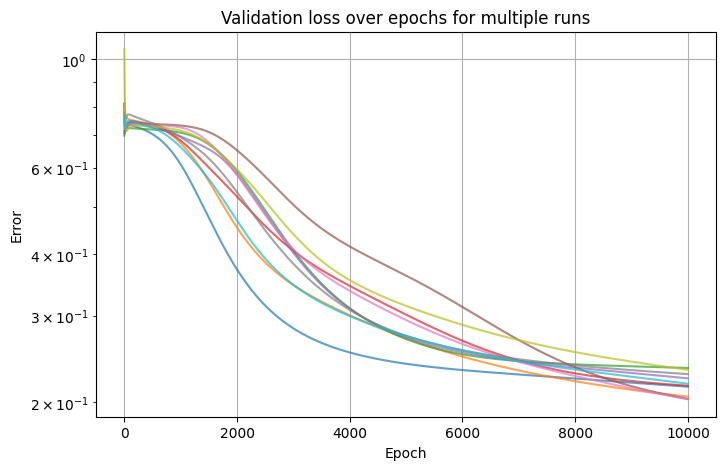

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
for i, hist in enumerate(error_histories):
    plt.plot(hist, alpha=0.7)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Validation loss over epochs for multiple runs')
# plt.legend(ncol=2, fontsize='small')
plt.grid(True)
plt.yscale('log')
plt.show()